# World Happiness: Linear Regression Analysis (Machine Learning)

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To keep matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#creating a path
path = r'/Users/jonahsnewmacbook/Desktop/Data Analytics/Data Immersion/Achievement 6/World Happiness'

In [4]:
#import World Happiness Dataframe
WH = pd.read_csv(os.path.join(path, 'Data', 'WHVisuals.csv'))

In [5]:
WH.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region,Happiness Category
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe,High Happiness
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Western Europe,High Happiness
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Western Europe,High Happiness
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Western Europe,High Happiness
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America,High Happiness


In [6]:
WH.shape

(782, 12)

In [8]:
# Checking for nulls
WH.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
Region                           0
Happiness Category               0
dtype: int64

In [9]:
# change the null to median
WH['Trust (Government Corruption)'].fillna(WH['Trust (Government Corruption)'].median(), inplace=True)

In [10]:
WH.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
Region                           0
Happiness Category               0
dtype: int64

In [11]:
#save the new dataframe to CSV
WH.to_csv(os.path.join(path,'Data', 'WorldHappinesscleaned.csv'))

In [12]:
# look for duplicates
dups = WH.duplicated()

In [15]:
dups.shape #no duplicates

(782,)

From the last exercise, extreme values were checked and there was none.

Using pair plot to choose which variables I would like to test

In [16]:
WHpairplot = WH[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

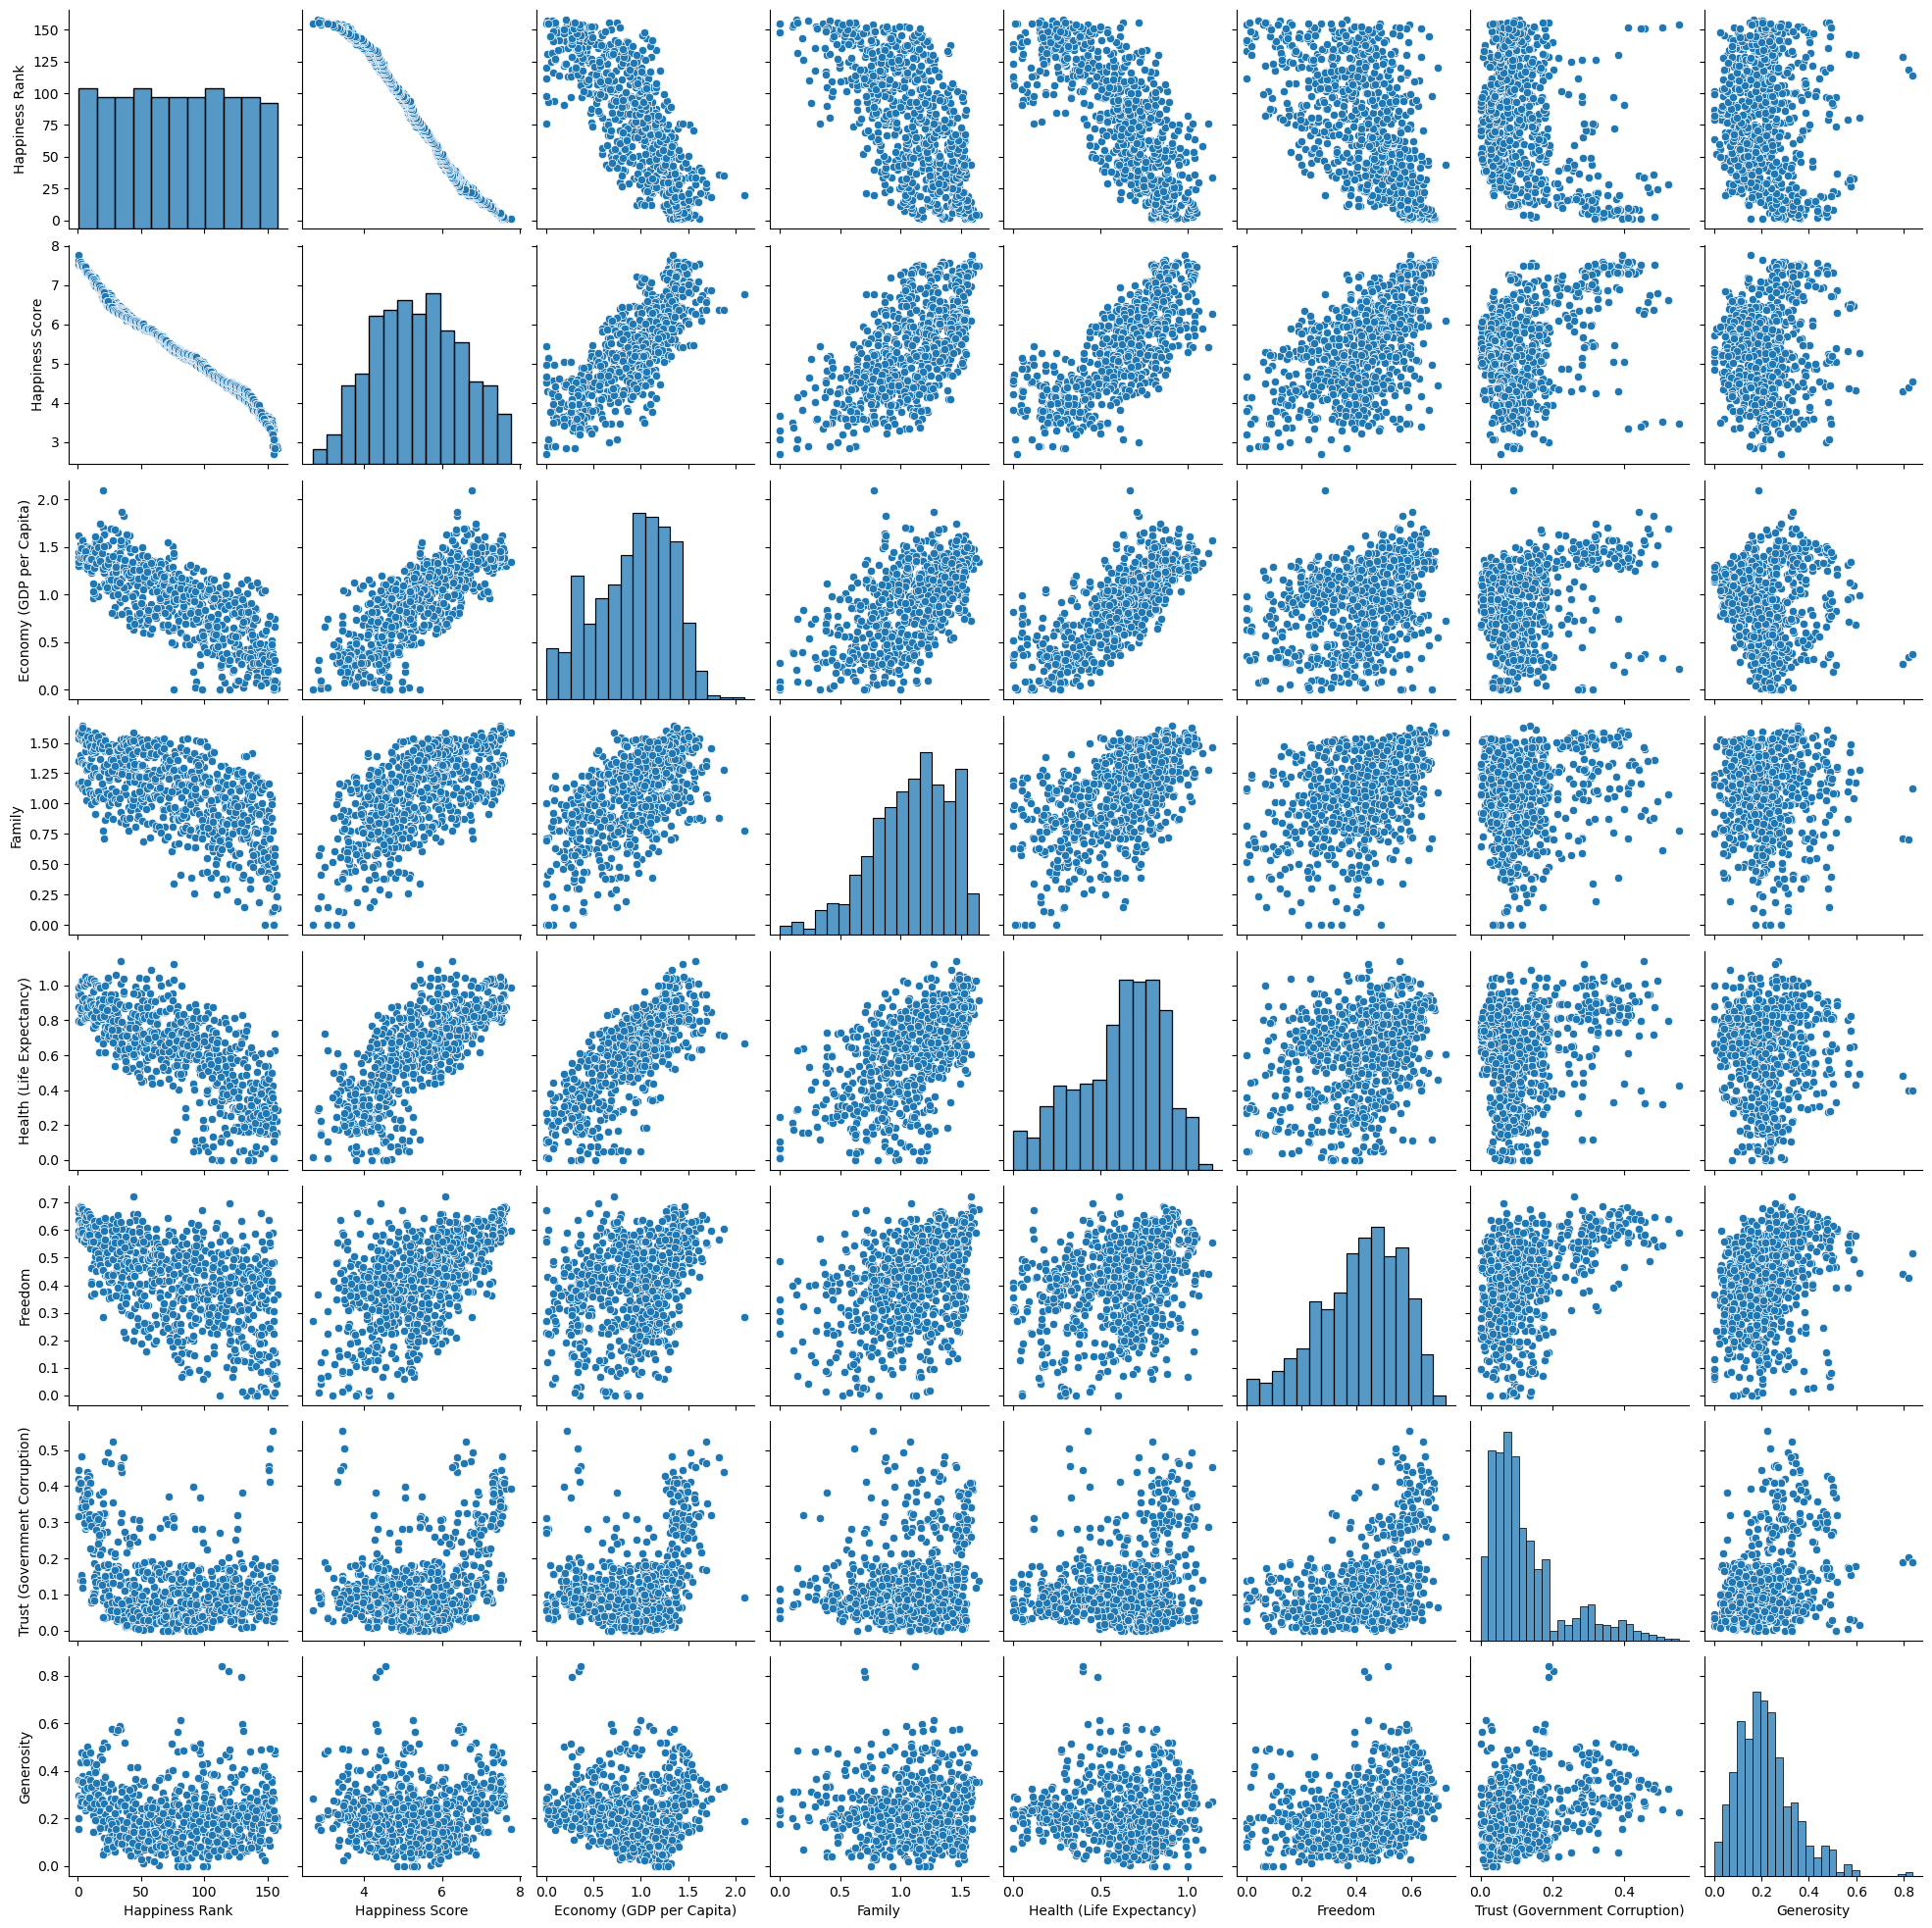

In [17]:
pair = sns.pairplot(WHpairplot)

Looking at the scatterplots, there are plenty relationships that have great shape so I would like to explore those variables:
- Economy and Happiness Score
- Family and Happiness Score
- Health and Score
- Health and Economy
- Health and Family
- Family and Economy
- Freedom and Trust

I am most curious with Economy and Happiness Score. I hypothesize that the higher the GDP (Economy) the Happiness Score is also higher.

### Regression Analysis

Regression Analysis for Economy (GDP per Capita) and Happiness Score
- x: Happiness Score
- y: Economy (GDP per Capita)

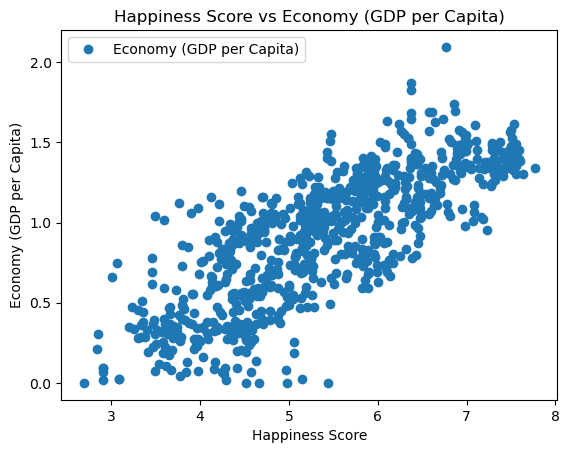

In [19]:
#Create a scatterplot (motplotlib)
WH.plot(x = 'Happiness Score', y='Economy (GDP per Capita)',style='o') # 'o' means to choose scatterplot
plt.title('Happiness Score vs Economy (GDP per Capita)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Economy (GDP per Capita)')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = WH['Happiness Score'].values.reshape(-1,1)
y = WH['Economy (GDP per Capita)'].values.reshape(-1,1)

In [21]:
#check for the NumPy arrays
x

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [22]:
y

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [25]:
#Split data into a training set and a test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [26]:
#Create a regression object
regression = LinearRegression()

In [27]:
#Fit the regression object onto the training set
regression.fit(x_train, y_train)

LinearRegression()

In [28]:
#Predict the values of y using x
y_predicted = regression.predict(x_test)

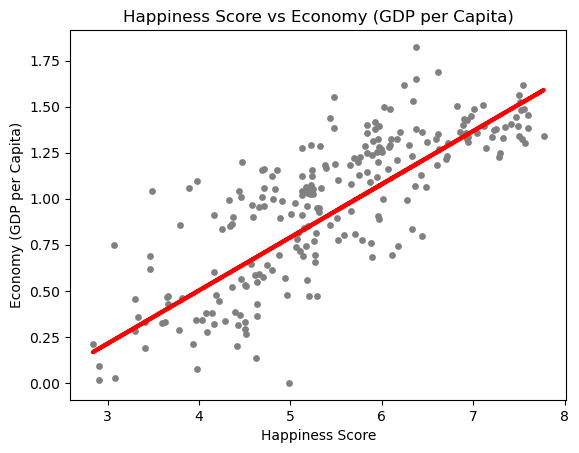

In [29]:
#Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy (GDP per Capita)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy (GDP per Capita)')
plot_test.show()

In [30]:
#Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.28868066]]
Mean squared error:  0.0631707451550851
R2 score:  0.6045532311335717


In [32]:
y_predicted

array([[0.94249581],
       [1.33539016],
       [1.17892521],
       [1.40265276],
       [0.43903672],
       [0.70202477],
       [0.61484324],
       [0.80854796],
       [1.34780343],
       [0.9318146 ],
       [1.21962922],
       [0.90323522],
       [0.30999647],
       [0.82702352],
       [0.18615246],
       [1.03198679],
       [0.55710713],
       [0.61080169],
       [0.73320231],
       [0.91507108],
       [1.18787435],
       [0.49504077],
       [0.70433424],
       [1.13706655],
       [1.25600298],
       [1.43411895],
       [1.0109131 ],
       [1.54150815],
       [0.40324034],
       [1.34607135],
       [1.18758567],
       [0.91507112],
       [1.03140943],
       [0.3319362 ],
       [1.4393152 ],
       [0.63389616],
       [0.23753762],
       [0.82673484],
       [1.10386831],
       [1.12811745],
       [0.64861888],
       [1.06922666],
       [1.12984953],
       [0.88678042],
       [1.46298701],
       [1.45086243],
       [0.97800351],
       [0.871

Creating a dataframe comparing the actual and the predicted values of y

In [36]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.101803,0.942496
1,1.398000,1.335390
2,1.530624,1.178925
3,1.394510,1.402653
4,0.285200,0.439037
5,1.156873,0.702025
6,0.385000,0.614843
7,0.740370,0.808548
8,1.425390,1.347803
9,1.186490,0.931815


Comparing how the regression fits the training set

In [37]:
y_predicted_train = regression.predict(x_train) #predicting the x_train

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.28868066]]
Mean squared error:  0.06255669552798225
R2 score:  0.6245244479747896


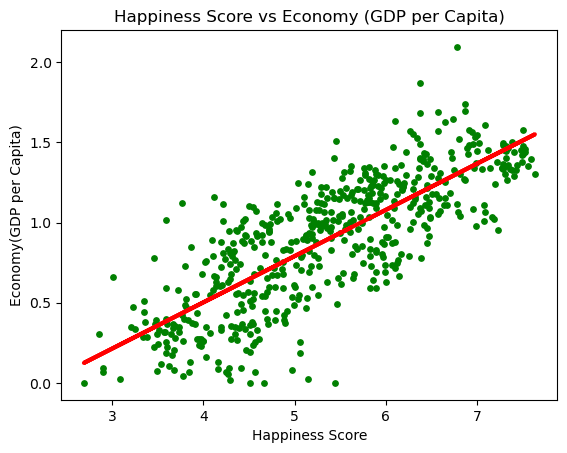

In [41]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy (GDP per Capita)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy(GDP per Capita)')
plot_test.show()

### Interpretation of the analysis:

Training Set:
- Slope: [[0.28868066]]
- Mean squared error:  0.06255669552798225
- R2 score:  0.6245244479747896

Test Set:
- Slope: [[0.28868066]]
- Mean squared error:  0.0631707451550851
- R2 score:  0.6045532311335717

The fit of the line is best described in the value of R2 score. R2 is used to see how well the actual data will predict expected data. The model performed very well. Since the model has a low mean squared error, that means that the model is close to the actual data.